In [1]:
import importlib as oe
import Generators as gen
import porespy as ps
from Generators import RandomGenerator
from Plotting import ImagePlotter
import matplotlib.pylab as plt
import gc
import numpy as np
import metrics_images as mtr
gc.collect()


[00:08:21] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=483510;file:///home/tqm5707/anaconda3/envs/Series2Vec/lib/python3.12/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:]8;id=192449;file:///home/tqm5707/anaconda3/envs/Series2Vec/lib/python3.12/site-packages/openpnm/utils/_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

Please install opencv for full functionality related to image color to grayscale


20

In [71]:
oe.reload(gen)

# Usage Example
if __name__ == "__main__":
    # Generate texture
    base_name = "blobs"
    generator = gen.PoresPyGenerator(size=(128, 128),name=base_name)
    texture_data =generator.generate(porosity=None,blobiness=[3,2])
    
    #Plot the result
    ImagePlotter.plot(texture_data, title='PorePy Texture')
gc.collect()


Using seed: 1135248362
Done! - Used the blobs function with the following parameters: "shape": (128, 128)
metadata: {'generator_type': 'PoresPyGenerator/blobs_/128_128', 'size': (128, 128), 'seed': 1135248362, 'porosity': None, 'blobiness': [3, 2]}


38462

Plotting Hilbert Curve with Hilbert Time Series


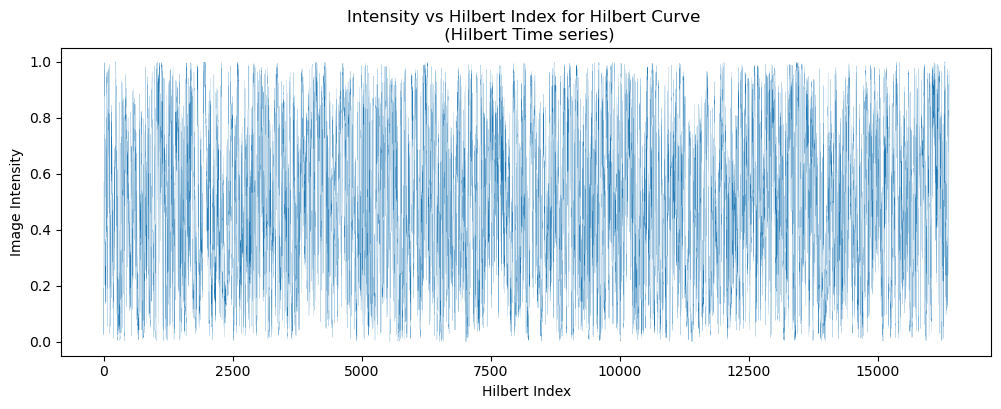

In [72]:
import Hilbertize_image as hilbert_code
oe.reload(hilbert_code)
t, intensities,locs = hilbert_code.make_hilbert_curve(generator.data,save_locs=True,
                                                 plot_hilbert=False,plot_reconstructed=False,
                                                 plot_hilbert_reconstructed=False,
                                                 save_to_file=False,num_bits=7)

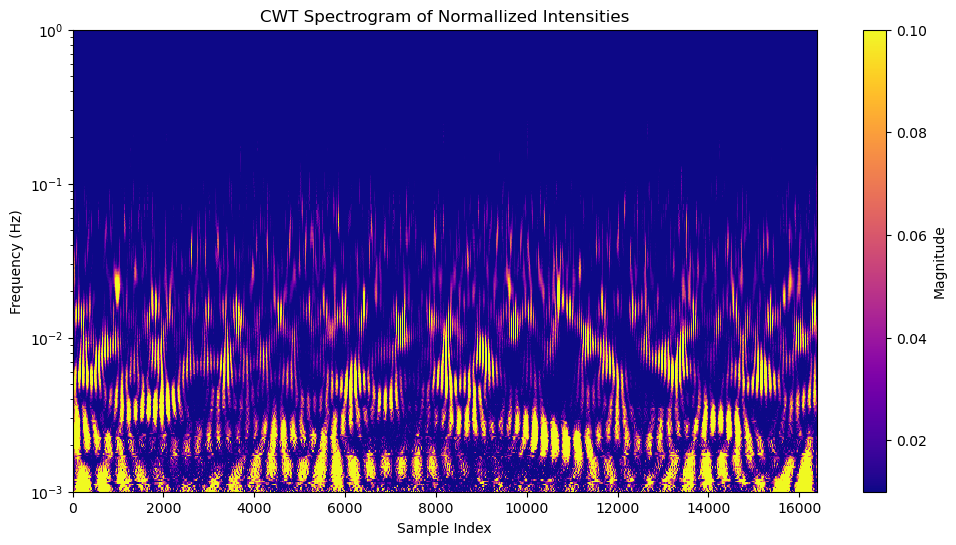

In [73]:
import Plotting_spectra as pyspt
#coefficients, frequencies = pywt.cwt(intensities, np.arange(.1, 100), 'mexh', sampling_period=1.)
pyspt.simple_cwt_spectra_plotting(intensities,
                                  lower_freq=0.001,
                                  vmax=.1,vmin=0.01,log_power=False)

# Statistical Metrics for the hilbert time series

In [74]:
# import metrics_timeseries as mtr
# oe.reload(mtr)
# features_antr,features_tsfel = mtr.generate_stat_features(intensities)

In [75]:
# features_antr

In [76]:
gc.collect()


11766

## Visibility Graph

In [77]:
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# 2. Build visibility graph
g = NaturalVG(directed=None).build(intensities)
nxg = g.as_networkx()

# 3. Make plots
fig, [ax0, ax1] = plt.subplots(ncols=1,nrows=2, figsize=(12, 6),height_ratios=(1,10))

ax0.plot(intensities,linewidth=0.1)
ax0.set_title("Time Series")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}
print('here')
nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(intensities,linewidth=0.01)
ax1.set_title("Visibility Graph")

# print('here2')
# nx.draw_networkx(nxg, ax=ax2, pos=nx.spring_layout(nxg))
# ax2.set_title("Visibility Graph")

here


Text(0.5, 1.0, 'Visibility Graph')

In [78]:
# 3. Get degree distribution
ks, ps = g.degree_distribution

# 4. Make plots
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, figsize=(12, 12))

ax0.plot(intensities, c="#000", linewidth=.1)
ax0.set_title("Time Series")
ax0.set_xlabel("t")

ax1.scatter(ks, ps, s=2, c="#000", alpha=1)
ax1.set_title("Degree Distribution")
ax1.set_xlabel("k")
ax1.set_ylabel("P(k)")

ax2.scatter(ks, ps, s=2, c="#000", alpha=1)
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_title("Degree Distribution (log-log)")
ax2.set_xlabel("k")
ax2.set_ylabel("P(k)")

Text(0, 0.5, 'P(k)')

In [79]:
from cdlib import algorithms

In [80]:
leiden_coms = algorithms.louvain(nxg,resolution= .9,randomize = False)
print(leiden_coms.average_internal_degree())
print(leiden_coms.erdos_renyi_modularity())
print(leiden_coms.modularity_density())
print(leiden_coms.z_modularity())
print(len(leiden_coms.communities))

FitnessResult(min=6.463768115942029, max=9.34322033898305, score=8.074314230457942, std=0.6134250230651074)
FitnessResult(min=None, max=None, score=0.9662841626926034, std=None)
FitnessResult(min=None, max=None, score=539.739163587983, std=None)
FitnessResult(min=None, max=None, score=7.250343873027008, std=None)
68


In [81]:
# from cdlib import evaluation
# from cdlib import ensemble

# resolution = ensemble.Parameter(name="resolution", start=0.1, end=5, step=0.3)
# randomize = ensemble.BoolParameter(name="randomize")
# louvain_conf = [resolution, randomize]

# # epsilon = ensemble.Parameter(name="epsilon", start=0.2, end=0.7, step=0.1)
# # demon_conf = [epsilon]

# methods = [algorithms.louvain]

# #for coms, scoring in ensemble.pool_grid_filter(nxg, methods, [louvain_conf], quality_score=[evaluation.erdos_renyi_modularity,evaluation.modularity_density,evaluation.z_modularity],aggregate=max):
# for coms, scoring in ensemble.pool_grid_filter(nxg, methods, [louvain_conf], quality_score=evaluation.modularity_density,aggregate=max):
#     print("%s\nConfiguration: %s \nScoring: %s\n" %(coms.method_name, coms.method_parameters, scoring))

(0.0, 5000.0)

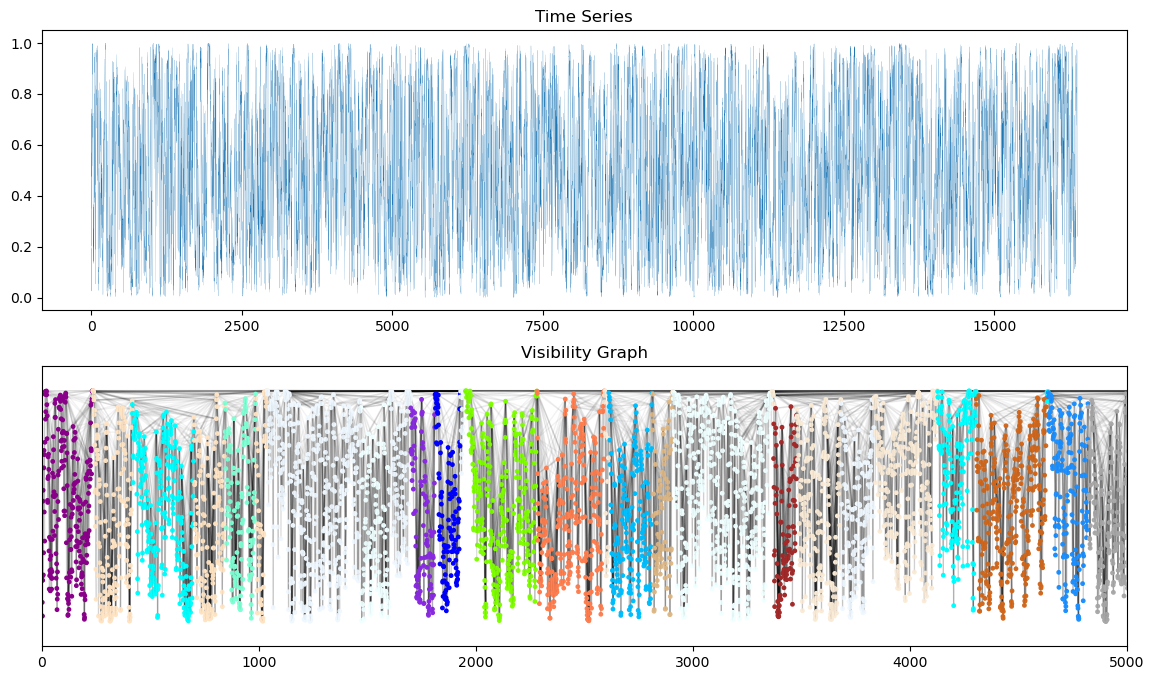

In [82]:
#leiden_coms = algorithms.leiden(nxg)

# 4. Make plots

import matplotlib.colors as mcolors
num_colors = 50
color_names = list(mcolors.CSS4_COLORS.keys())
COLORS = [mcolors.to_hex(color_names[i % len(color_names)])
        for i in range(num_colors)]

node_colors = ["#000000"] * len(intensities)
for community_id, community_nodes in enumerate(leiden_coms.communities):
    for node in community_nodes:
        node_colors[node] = COLORS[community_id % len(COLORS)]

fig, [ax0, ax1] = plt.subplots(nrows=2, figsize=(14, 8))

ax0.plot(intensities,linewidth=0.1)
ax0.set_title("Time Series")
plt.xlim([0,1000])
graph_plot_options = {
    "with_labels": False,
    "node_size": 6,
    "node_color": [node_colors[n] for n in nxg.nodes],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), edge_color=[(0, 0, 0, 0.05)], **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(intensities, linewidth=0.1, c=(0, 0, 0, 0.15))
ax1.set_title("Visibility Graph")
plt.xlim([0,5000])

Text(0.5, 1.0, 'Hilbert Reconstruction with Hilbert Curve')

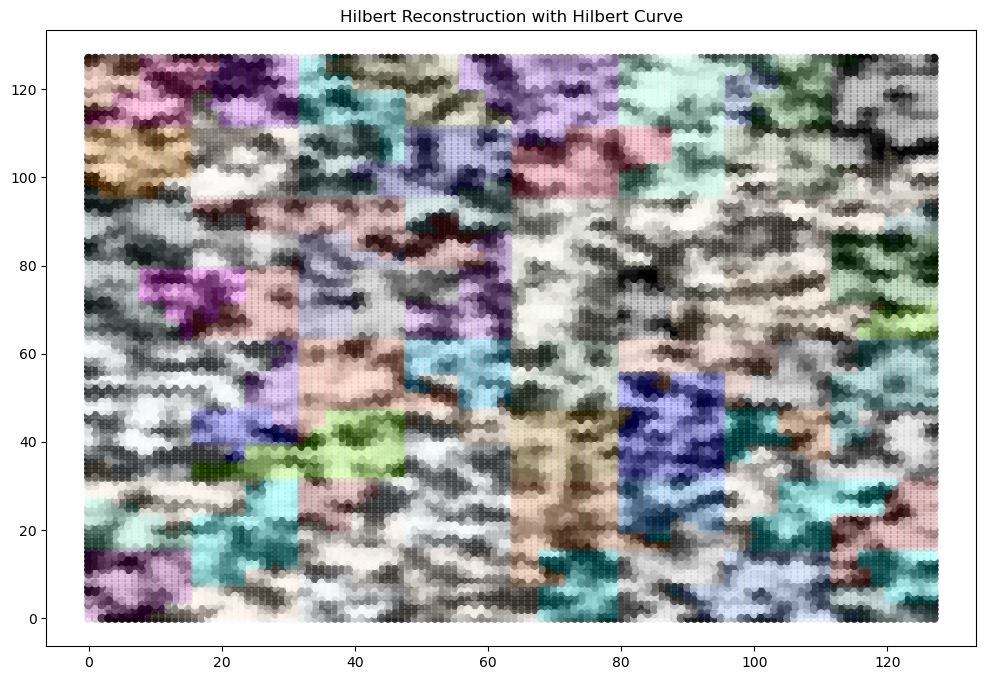

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(locs[:,1],locs[:,0],c=intensities,s=30,cmap='Grays',
            vmin=intensities.min(), vmax=intensities.max(),alpha=1)
plt.scatter(locs[:,1],locs[:,0],c=node_colors,s=30,cmap='RdYlBu_r',
            vmin=intensities.min(), vmax=intensities.max(),alpha=0.1)

plt.title('Hilbert Reconstruction with Hilbert Curve')


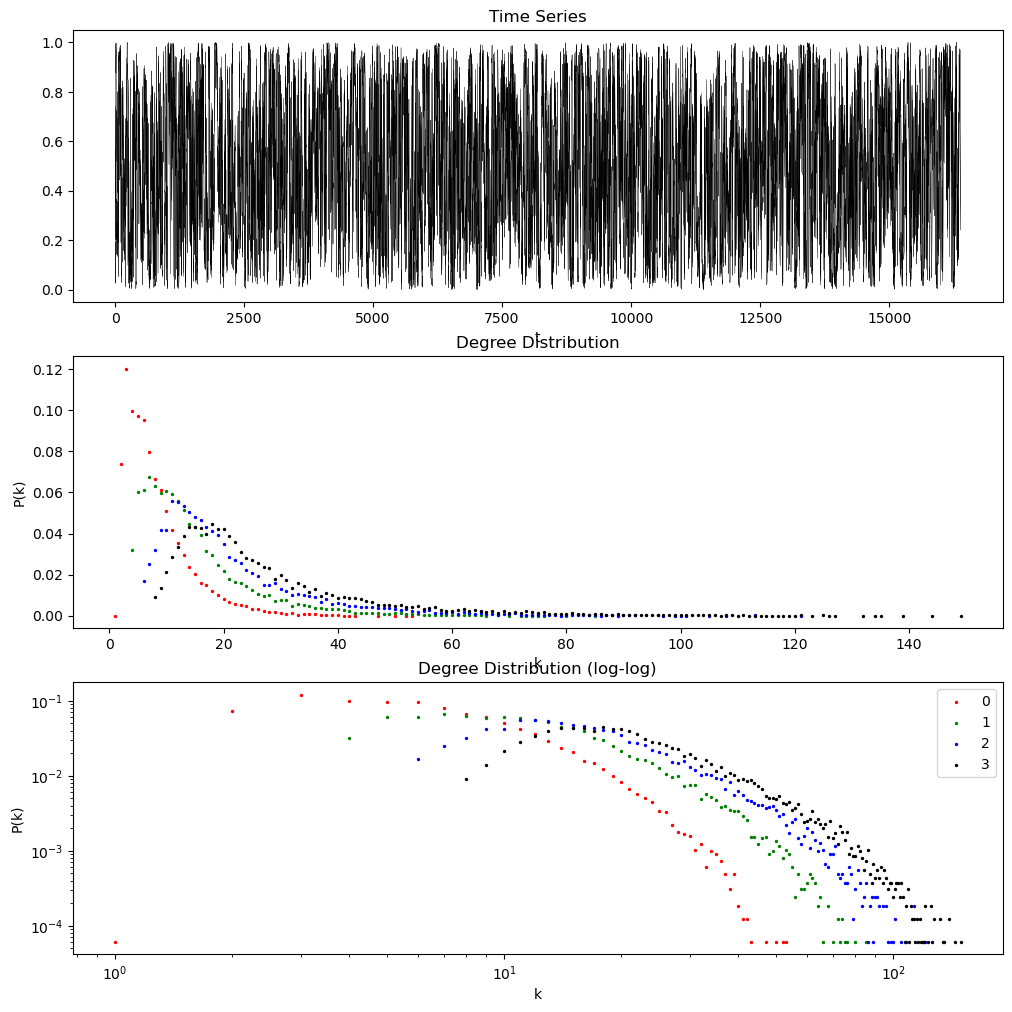

In [86]:
from ts2vg import NaturalVG
import matplotlib.pyplot as plt

# 4. Make plots
plt.close('all')
fig, [ax0, ax1, ax2] = plt.subplots(nrows=3, figsize=(12, 12))
cl = np.array(['red','green','blue','black'])
for i in range(0,4):
    nvg = NaturalVG(penetrable_limit=i).build(intensities)
    # 3. Get degree distribution
    ks, ps = nvg.degree_distribution
    
    ax0.plot(intensities, c="#000", linewidth=.1)
    ax0.set_title("Time Series")
    ax0.set_xlabel("t")
    
    ax1.scatter(ks, ps, s=2,c=cl[i], alpha=1)
    ax1.set_title("Degree Distribution")
    ax1.set_xlabel("k")
    ax1.set_ylabel("P(k)")
    
    ax2.scatter(ks, ps, s=2,color=cl[i], alpha=1,label=str(i))
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_title("Degree Distribution (log-log)")
    ax2.set_xlabel("k")
    ax2.set_ylabel("P(k)")
    del nvg
plt.legend()

In [92]:
nvg = NaturalVG(penetrable_limit=0,directed=None).build(intensities)
nxg_pen = nvg.as_networkx()

leiden_coms = algorithms.louvain(nxg_pen,resolution= .5,randomize = False)
#leiden_coms = algorithms.leiden(nxg_pen)
print(leiden_coms.average_internal_degree())
print(leiden_coms.erdos_renyi_modularity())
print(leiden_coms.modularity_density())
print(leiden_coms.z_modularity())
print(len(leiden_coms.communities))

FitnessResult(min=5.463414634146342, max=10.173913043478262, score=7.93147537903295, std=0.7677182573347106)
FitnessResult(min=None, max=None, score=0.9643644410036809, std=None)
FitnessResult(min=None, max=None, score=680.6210767317563, std=None)
FitnessResult(min=None, max=None, score=7.85061034264035, std=None)
88


Text(0.5, 1.0, 'Hilbert Reconstruction with Hilbert Curve')

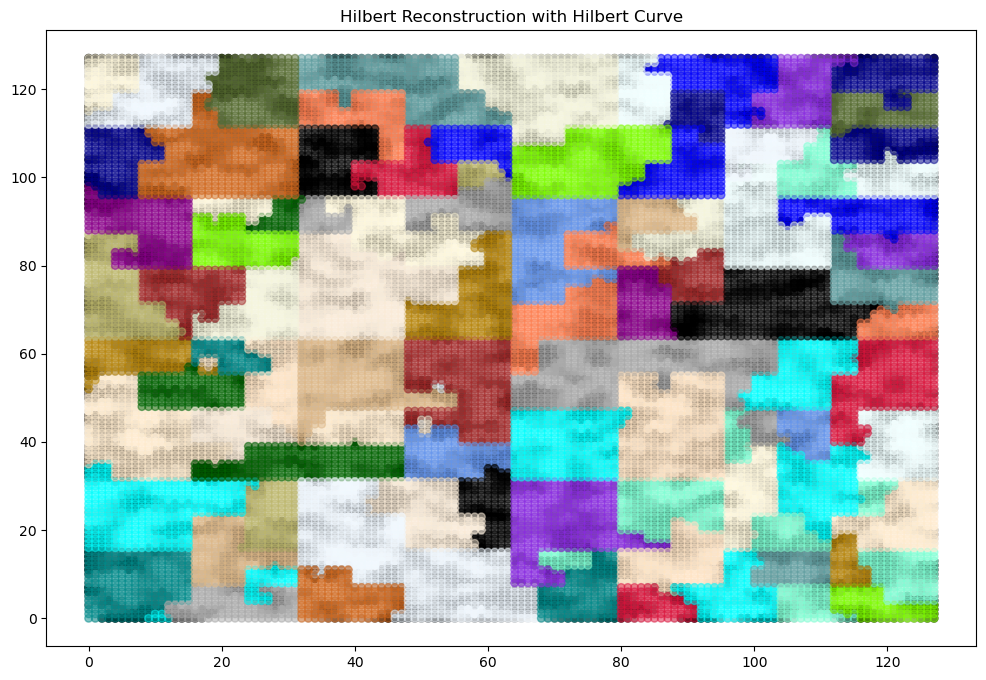

In [93]:
# 4. Make plots
import matplotlib.colors as mcolors
num_colors = 30
color_names = list(mcolors.CSS4_COLORS.keys())
COLORS = [mcolors.to_hex(color_names[i % len(color_names)])
        for i in range(num_colors)]

node_colors = ["#000000"] * len(intensities)
for community_id, community_nodes in enumerate(leiden_coms.communities):
    for node in community_nodes:
        node_colors[node] = COLORS[community_id % len(COLORS)]

plt.figure(figsize=(12,8))
plt.scatter(locs[:,1],locs[:,0],c=intensities,s=30,cmap='Grays',
            vmin=intensities.min(), vmax=intensities.max(),alpha=1)
plt.scatter(locs[:,1],locs[:,0],c=node_colors,s=30,cmap='RdYlBu_r',
            vmin=intensities.min(), vmax=intensities.max(),alpha=0.5)

plt.title('Hilbert Reconstruction with Hilbert Curve')


### Comparison 

(0.0, 5000.0)

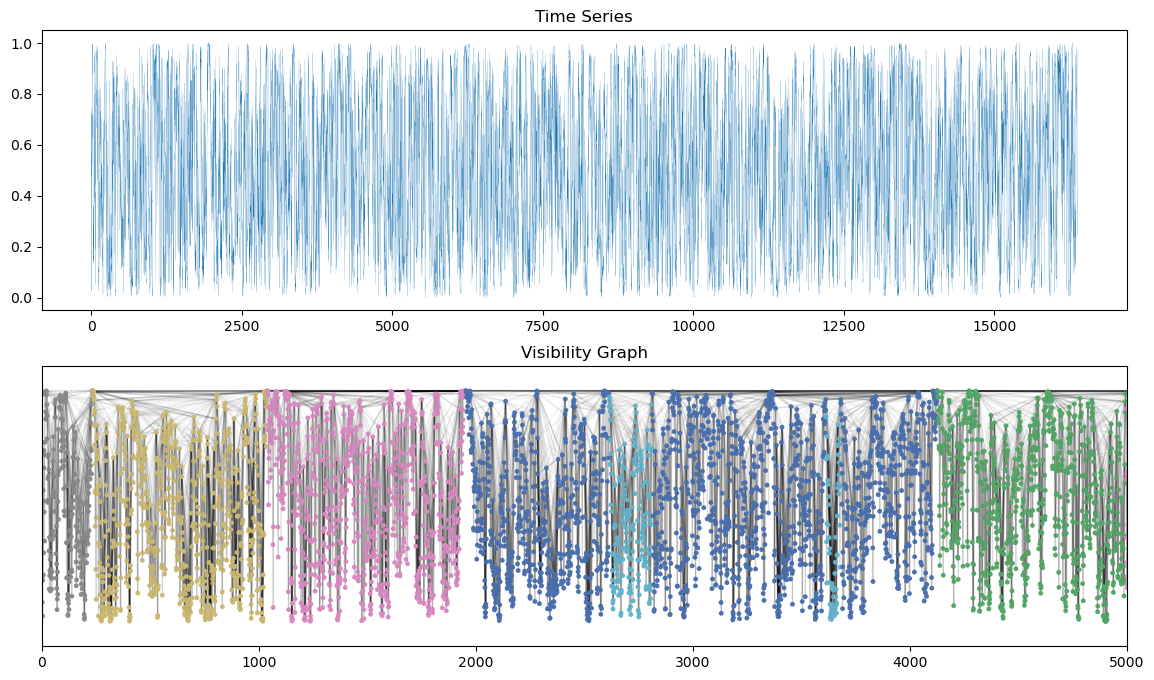

In [94]:
# 3. Partition the graph into communities
communities = nx.algorithms.community.greedy_modularity_communities(nxg)

# 4. Make plots

COLORS = [
    "#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
    "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD",
]

node_colors = ["#000000"] * len(intensities)
for community_id, community_nodes in enumerate(communities):
    for node in community_nodes:
        node_colors[node] = COLORS[community_id % len(COLORS)]

fig, [ax0, ax1] = plt.subplots(nrows=2, figsize=(14, 8))

ax0.plot(intensities,linewidth=0.1)
ax0.set_title("Time Series")
plt.xlim([0,1000])
graph_plot_options = {
    "with_labels": False,
    "node_size": 6,
    "node_color": [node_colors[n] for n in nxg.nodes],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), edge_color=[(0, 0, 0, 0.05)], **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(intensities, linewidth=0.1, c=(0, 0, 0, 0.15))
ax1.set_title("Visibility Graph")
plt.xlim([0,5000])

Text(0.5, 1.0, 'Hilbert Reconstruction with Hilbert Curve')

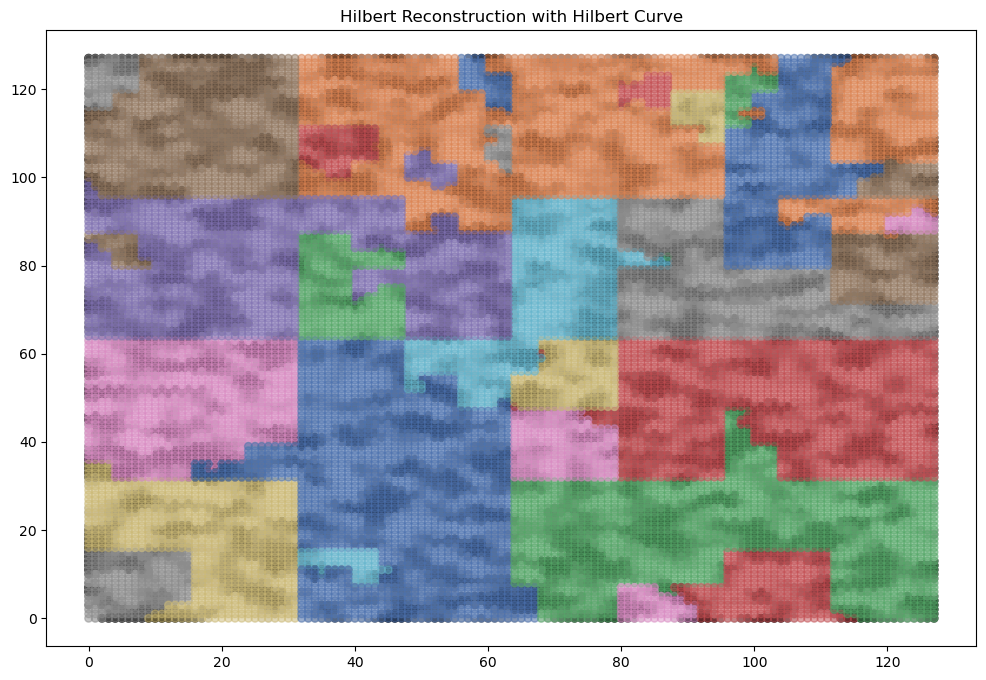

In [96]:
plt.figure(figsize=(12,8))
plt.scatter(locs[:,1],locs[:,0],c=intensities,s=30,cmap='Grays',
            vmin=intensities.min(), vmax=intensities.max(),alpha=1)
plt.scatter(locs[:,1],locs[:,0],c=node_colors,s=30,cmap='RdYlBu_r',
            vmin=intensities.min(), vmax=intensities.max(),alpha=0.5)

plt.title('Hilbert Reconstruction with Hilbert Curve')
